In [ ]:
# if want package reload

#import importlib
#reload(module_name)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

In [2]:
# get data
data = pd.read_csv("../전처리/전처리_최종.csv", encoding="CP949")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
# 금리 차이 구하기
data['금리차'] = data['예금은행 대출금리'] - data['가중평균발행금리']
data

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
0,MBS 2004-01,2004-06-15,2004-06,0.5100,5.040,52.743,51.435,72.119,794.0,785.79,5.99,0.950
1,MBS 2004-01,2004-06-15,2004-07,0.3600,5.040,52.603,51.040,72.561,858.0,735.34,5.93,0.890
2,MBS 2004-02,2004-07-28,2004-07,0.1800,5.000,52.603,51.040,72.561,858.0,735.34,5.93,0.930
3,MBS 2004-01,2004-06-15,2004-08,0.4200,5.040,52.394,50.554,73.191,842.0,803.57,5.80,0.760
4,MBS 2004-02,2004-07-28,2004-08,0.3900,5.000,52.394,50.554,73.191,842.0,803.57,5.80,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...
34712,MBS 2022-09,2022-05-13,2022-06,0.2224,3.997,100.869,100.912,108.220,824.0,2332.64,4.04,0.043
34713,MBS 2022-10,2022-05-24,2022-06,0.3491,3.929,100.869,100.912,108.220,824.0,2332.64,4.04,0.111
34714,MBS 2022-11,2022-06-10,2022-06,0.2994,4.134,100.869,100.912,108.220,824.0,2332.64,4.04,-0.094
34715,MBS 2022-12,2022-06-21,2022-06,0.2903,4.246,100.869,100.912,108.220,824.0,2332.64,4.04,-0.206


In [4]:
# 발행회차, 일자, 기준월을 그룹화하여 재정렬
test2 = data.groupby(['발행회차','발행일자','기준월']).sum()
test2.to_csv("../전처리/mbs_groupby.csv", encoding="CP949")

In [5]:
# 재정렬 결과 가져오기
test3 = pd.read_csv("../전처리/mbs_groupby.csv", encoding="CP949")
test3

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
0,MBS 2004-01,2004-06-15,2004-06,0.5100,5.040,52.743,51.435,72.119,794.0,785.79,5.99,0.950
1,MBS 2004-01,2004-06-15,2004-07,0.3600,5.040,52.603,51.040,72.561,858.0,735.34,5.93,0.890
2,MBS 2004-01,2004-06-15,2004-08,0.4200,5.040,52.394,50.554,73.191,842.0,803.57,5.80,0.760
3,MBS 2004-01,2004-06-15,2004-09,0.2900,5.040,52.283,50.314,73.191,784.0,835.09,5.63,0.590
4,MBS 2004-01,2004-06-15,2004-10,0.4200,5.040,52.157,50.090,73.191,801.0,834.84,5.57,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...
34712,MBS 2022-10,2022-05-24,2022-05,0.2421,3.929,100.768,100.814,107.560,830.0,2685.90,3.90,-0.029
34713,MBS 2022-10,2022-05-24,2022-06,0.3491,3.929,100.869,100.912,108.220,824.0,2332.64,4.04,0.111
34714,MBS 2022-11,2022-06-10,2022-06,0.2994,4.134,100.869,100.912,108.220,824.0,2332.64,4.04,-0.094
34715,MBS 2022-12,2022-06-21,2022-06,0.2903,4.246,100.869,100.912,108.220,824.0,2332.64,4.04,-0.206


### 기초통계량 분석

In [6]:
# 데이터프레임의 정보, 결측치 확인
test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34717 entries, 0 to 34716
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발행회차         34717 non-null  object 
 1   발행일자         34717 non-null  object 
 2   기준월          34717 non-null  object 
 3   만기전상환율       34717 non-null  float64
 4   가중평균발행금리     34717 non-null  float64
 5   주택종합 매매가격지수  34717 non-null  float64
 6   주택종합 전세가격지수  34717 non-null  float64
 7   소비자물가지수      34717 non-null  float64
 8   15-64 실업자 수  34717 non-null  float64
 9   코스피 월별 종가    34717 non-null  float64
 10  예금은행 대출금리    34717 non-null  float64
 11  금리차          34717 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.2+ MB


In [7]:
# 결측치 확인
test3.isna().sum()

발행회차           0
발행일자           0
기준월            0
만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
금리차            0
dtype: int64

In [8]:
# 기초 통계 조회
test3.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
count,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000
mean,2.139585,3.158165,79.714278,84.159783,97.342261,919.957370,2256.168735,3.382053,0.223889
std,2.434816,1.686062,10.013927,10.472289,5.671699,133.817237,428.147488,0.874111,1.640746
min,0.000000,0.000000,51.567000,49.086000,72.119000,684.000000,735.340000,2.390000,-4.250000
25%,0.760000,2.170000,72.809000,80.703000,94.625000,817.000000,1987.010000,2.740000,-0.800000
50%,1.500000,3.160000,78.049000,85.623000,98.779000,908.000000,2108.330000,3.220000,0.170000
75%,2.730000,4.450000,83.137000,87.207000,100.180000,1021.000000,2467.490000,3.730000,1.040000
max,96.181300,6.640000,100.869000,100.912000,108.220000,1186.000000,3296.680000,7.580000,5.900000


In [9]:
# 아주 간단하게 상관관계 분석
test3.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
만기전상환율,1.000000,0.194170,-0.254380,-0.172973,-0.201059,-0.037547,-0.210616,-0.031371,-0.216246
가중평균발행금리,0.194170,1.000000,-0.283776,-0.342710,-0.340988,-0.105400,-0.241836,0.310362,-0.862273
주택종합 매매가격지수,-0.254380,-0.283776,1.000000,0.922019,0.904084,-0.039206,0.828114,-0.422340,0.066611
주택종합 전세가격지수,-0.172973,-0.342710,0.922019,1.000000,0.969679,0.117448,0.783681,-0.669706,-0.004612
소비자물가지수,-0.201059,-0.340988,0.904084,0.969679,1.000000,0.146952,0.735953,-0.667232,-0.005063
15-64 실업자 수,-0.037547,-0.105400,-0.039206,0.117448,0.146952,1.000000,0.048864,-0.413933,-0.112213
코스피 월별 종가,-0.210616,-0.241836,0.828114,0.783681,0.735953,0.048864,1.000000,-0.393971,0.038626
예금은행 대출금리,-0.031371,0.310362,-0.422340,-0.669706,-0.667232,-0.413933,-0.393971,1.000000,0.213818
금리차,-0.216246,-0.862273,0.066611,-0.004612,-0.005063,-0.112213,0.038626,0.213818,1.000000


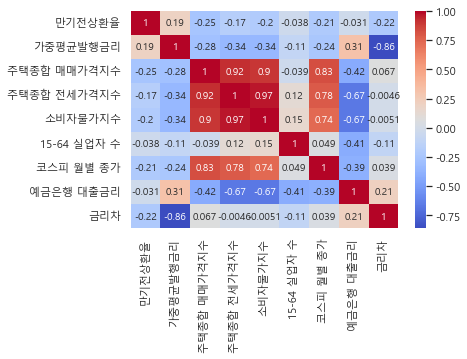

In [10]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(test3.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

### 현재 상관관계가 굉장히 높은 것들 (> |0.7|)
1. 가중평균발행금리 & 금리의 차이
2. 주택종합 매매가격지수 & 주택종합 전세가격지수
3. 소비자 물가지수 & 주택종합 매매가격지수
4. 소비자 물가지수 & 주택종합 전세가격지수
5. 코스피 월별종가 & 주택종합 매매가격지수
6. 코스피 월별종가 & 주택종합 전세가격지수

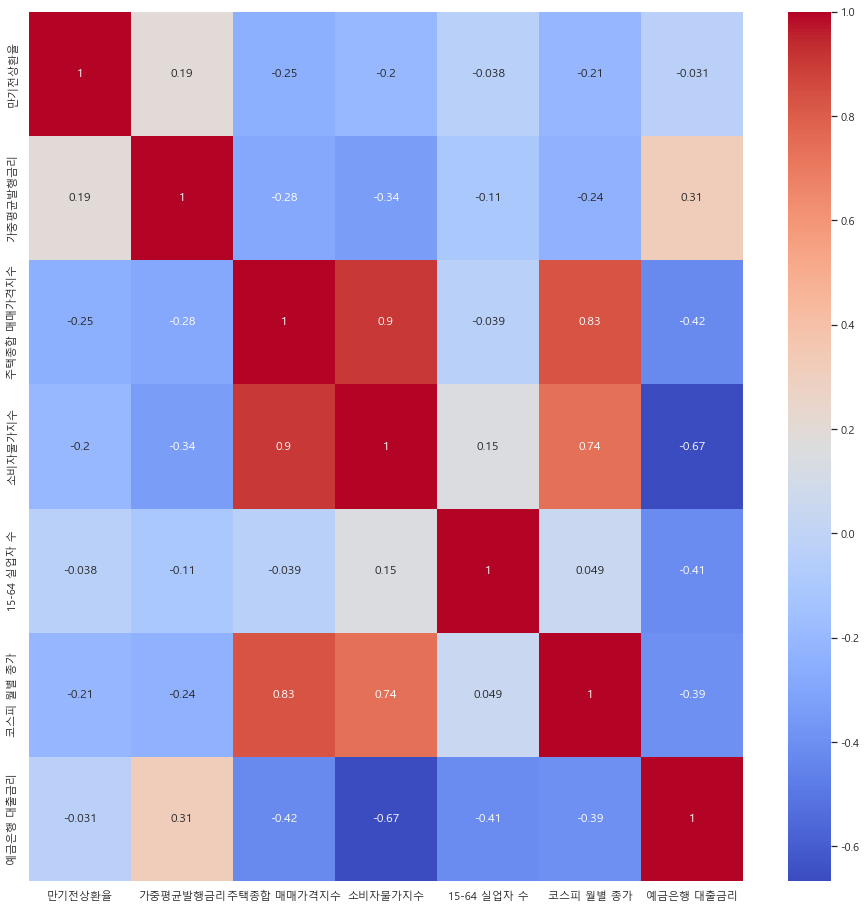

In [11]:
# 히트맵을 보고 컬럼에서 상관관계가 높다고 생각된 컬럼들 선정
test4 = test3.copy()
test4.drop(columns=['금리차','주택종합 전세가격지수'], inplace=True)

# 상관관계 재확인
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(test4.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

#### if Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씁니다
- Robuster : 아웃라이어를 없애버림 -> 막판에 만기전상환율이 튀는 걸 살리는 게 맞는 것 같습니다 (못 써요)
- Min-Max : 아웃라이어 살리고 데이터 분포 살리고 (남는 게 이거 뿐이네요)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


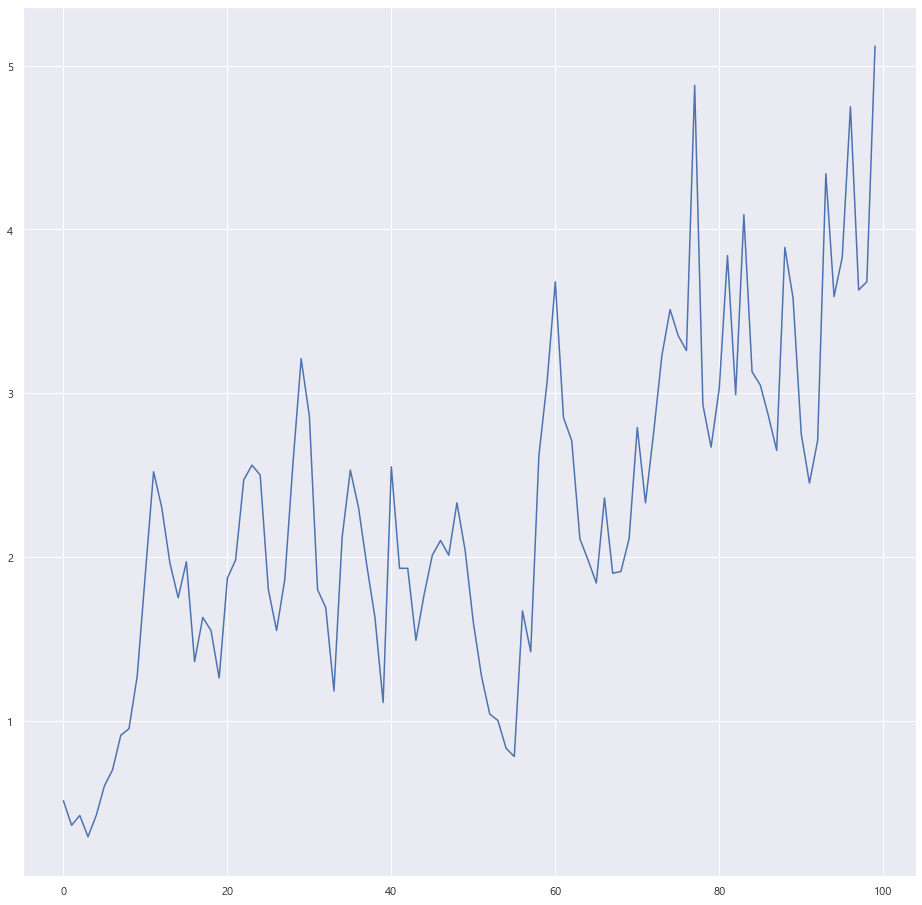

In [12]:
test3

x = test3.index[:100]
y = test3['만기전상환율'][:100]

print(x.values)
plt.plot(x, y.values)
plt.show()

In [13]:
# 주택 지수들은 lag (t-1) : 한 칸씩 내려요
# GDP : 보류 (만약 처리한다면 로그 차분)
# 소비자물가지수(CPI) : lag(t-1) --> 한 칸씩 내려요
# 실업자수 : 로그 차분
# 주가지수 : lag(t-1) --> 한 칸씩 내려요
# 대출금리 : lag(t-1) --> 한 칸씩 내려요
test5 = test3.copy()
test5

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
0,MBS 2004-01,2004-06-15,2004-06,0.5100,5.040,52.743,51.435,72.119,794.0,785.79,5.99,0.950
1,MBS 2004-01,2004-06-15,2004-07,0.3600,5.040,52.603,51.040,72.561,858.0,735.34,5.93,0.890
2,MBS 2004-01,2004-06-15,2004-08,0.4200,5.040,52.394,50.554,73.191,842.0,803.57,5.80,0.760
3,MBS 2004-01,2004-06-15,2004-09,0.2900,5.040,52.283,50.314,73.191,784.0,835.09,5.63,0.590
4,MBS 2004-01,2004-06-15,2004-10,0.4200,5.040,52.157,50.090,73.191,801.0,834.84,5.57,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...
34712,MBS 2022-10,2022-05-24,2022-05,0.2421,3.929,100.768,100.814,107.560,830.0,2685.90,3.90,-0.029
34713,MBS 2022-10,2022-05-24,2022-06,0.3491,3.929,100.869,100.912,108.220,824.0,2332.64,4.04,0.111
34714,MBS 2022-11,2022-06-10,2022-06,0.2994,4.134,100.869,100.912,108.220,824.0,2332.64,4.04,-0.094
34715,MBS 2022-12,2022-06-21,2022-06,0.2903,4.246,100.869,100.912,108.220,824.0,2332.64,4.04,-0.206


In [14]:
test5["주택종합 매매가격지수"] = test5["주택종합 매매가격지수"].shift(1)
test5["주택종합 전세가격지수"] = test5["주택종합 전세가격지수"].shift(1)
test5["가중평균발행금리"] = test5["가중평균발행금리"].shift(1)
test5["예금은행 대출금리"] = test5["예금은행 대출금리"].shift(1)
test5["금리차"] = test5["금리차"].shift(1)
test5["소비자물가지수"] = test5["소비자물가지수"].shift(1)
test5["코스피 월별 종가"] = test5["코스피 월별 종가"].shift(1)

In [15]:
np.log(test5['15-64 실업자 수'])

0        6.677083
1        6.754604
2        6.735780
3        6.664409
4        6.685861
           ...   
34712    6.721426
34713    6.714171
34714    6.714171
34715    6.714171
34716    6.714171
Name: 15-64 실업자 수, Length: 34717, dtype: float64

In [16]:
# lag 등을 고려하지 않고 현재 데이터에서 그냥 회귀분석

test6 = test3.copy()
test6

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
0,MBS 2004-01,2004-06-15,2004-06,0.5100,5.040,52.743,51.435,72.119,794.0,785.79,5.99,0.950
1,MBS 2004-01,2004-06-15,2004-07,0.3600,5.040,52.603,51.040,72.561,858.0,735.34,5.93,0.890
2,MBS 2004-01,2004-06-15,2004-08,0.4200,5.040,52.394,50.554,73.191,842.0,803.57,5.80,0.760
3,MBS 2004-01,2004-06-15,2004-09,0.2900,5.040,52.283,50.314,73.191,784.0,835.09,5.63,0.590
4,MBS 2004-01,2004-06-15,2004-10,0.4200,5.040,52.157,50.090,73.191,801.0,834.84,5.57,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...
34712,MBS 2022-10,2022-05-24,2022-05,0.2421,3.929,100.768,100.814,107.560,830.0,2685.90,3.90,-0.029
34713,MBS 2022-10,2022-05-24,2022-06,0.3491,3.929,100.869,100.912,108.220,824.0,2332.64,4.04,0.111
34714,MBS 2022-11,2022-06-10,2022-06,0.2994,4.134,100.869,100.912,108.220,824.0,2332.64,4.04,-0.094
34715,MBS 2022-12,2022-06-21,2022-06,0.2903,4.246,100.869,100.912,108.220,824.0,2332.64,4.04,-0.206


In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import test_package as tp

data = test6[['가중평균발행금리', '주택종합 매매가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '예금은행 대출금리']]
#data = test6[['주택종합 매매가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '금리차']]
target = test6['만기전상환율']

#tp.score_checker('elastic', data, target, 0.1)

alphas = [0, 0.1, 0.01, 1, 10, 100]
for alpha in alphas:
    tp.score_checker('elastic', data, target, alpha)

Alpha : 0
Elastic Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
Elastic RMSE scores : [3.195 3.453 2.279 1.268 1.091]
Elastic AVG RMSE : 2.257
Alpha : 0.1
Elastic Negative MSE score : [ -9.526 -12.053  -5.275  -1.582  -1.118]
Elastic RMSE scores : [3.086 3.472 2.297 1.258 1.057]
Elastic AVG RMSE : 2.234
Alpha : 0.01
Elastic Negative MSE score : [-10.131 -11.938  -5.204  -1.605  -1.178]
Elastic RMSE scores : [3.183 3.455 2.281 1.267 1.085]
Elastic AVG RMSE : 2.254
Alpha : 1
Elastic Negative MSE score : [ -8.215 -12.762  -5.423  -1.617  -1.356]
Elastic RMSE scores : [2.866 3.572 2.329 1.272 1.164]
Elastic AVG RMSE : 2.241
Alpha : 10
Elastic Negative MSE score : [ -7.642 -12.964  -5.409  -1.703  -1.644]
Elastic RMSE scores : [2.764 3.601 2.326 1.305 1.282]
Elastic AVG RMSE : 2.256
Alpha : 100
Elastic Negative MSE score : [ -7.543 -13.027  -5.382  -1.715  -1.798]
Elastic RMSE scores : [2.746 3.609 2.32  1.31  1.341]
Elastic AVG RMSE : 2.265


In [18]:
# 알파는 과연 얼마나 주는 것이 바람직한가
# alpha 0.1 확정
# 그런데 이렇게 거창하게 쓰기 싫어서 위에 처럼 함수로 만들어버림

import warnings
warnings.filterwarnings('ignore')

alphas = [0, 0.1, 0.01, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic = ElasticNet(alpha=alpha)

    rid_mse_score = cross_val_score(ridge, data, target, scoring="neg_mean_squared_error")
    sso_mse_score = cross_val_score(lasso, data, target, scoring="neg_mean_squared_error")
    ela_mse_score = cross_val_score(elastic, data, target, scoring="neg_mean_squared_error")

    rid_rmse_score = np.sqrt(-1 * rid_mse_score)
    sso_rmse_score = np.sqrt(-1 * sso_mse_score)
    ela_rmse_score = np.sqrt(-1 * ela_mse_score)

    rid_avg_rmse = np.mean(rid_rmse_score)
    sso_avg_rmse = np.mean(sso_rmse_score)
    ela_avg_rmse = np.mean(ela_rmse_score)

    print(f'alpha {alpha} Ridge Negative MSE score : {np.round(rid_mse_score, 3)}')
    print(f'alpha {alpha} Ridge RMSE scores : {np.round(rid_rmse_score, 3)}')
    print(f'alpha {alpha} Ridge AVG RMSE : {rid_avg_rmse:.3f}\n')

    print(f'alpha {alpha} Lasso Negative MSE score : {np.round(sso_mse_score, 3)}')
    print(f'alpha {alpha} Lasso RMSE scores : {np.round(sso_rmse_score, 3)}')
    print(f'alpha {alpha} Lasso AVG RMSE : {sso_avg_rmse:.3f}\n')

    print(f'alpha {alpha} Elastic Negative MSE score : {np.round(ela_mse_score, 3)}')
    print(f'alpha {alpha} Elastic RMSE scores : {np.round(ela_rmse_score, 3)}')
    print(f'alpha {alpha} Elastic AVG RMSE : {ela_avg_rmse:.3f}\n')

alpha 0 Ridge Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0 Ridge RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0 Ridge AVG RMSE : 2.257

alpha 0 Lasso Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0 Lasso RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0 Lasso AVG RMSE : 2.257

alpha 0 Elastic Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0 Elastic RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0 Elastic AVG RMSE : 2.257

alpha 0.1 Ridge Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0.1 Ridge RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0.1 Ridge AVG RMSE : 2.257

alpha 0.1 Lasso Negative MSE score : [ -8.987 -12.11   -5.27   -1.571  -1.125]
alpha 0.1 Lasso RMSE scores : [2.998 3.48  2.296 1.253 1.06 ]
alpha 0.1 Lasso AVG RMSE : 2.217

alpha 0.1 Elastic Negative MSE score : [ -9.526 -12.053  -5.275  -1.582  -1.118]
alpha 0.1 Elastic RMSE scores : [3.086 3.472 2.297 1.258

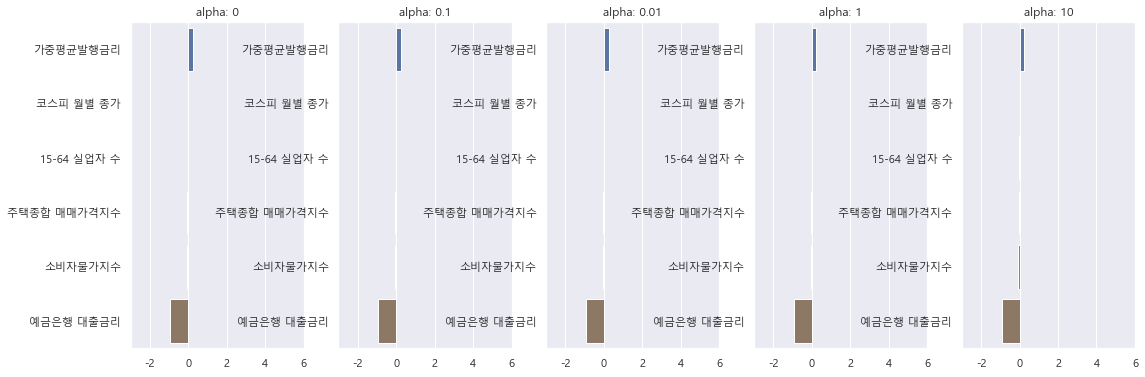

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246184    0.246183     0.246184  0.246178   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002640   -0.002640    -0.002640 -0.002639  -0.002638
주택종합 매매가격지수 -0.052596   -0.052597    -0.052596 -0.052605  -0.052685
소비자물가지수     -0.060319   -0.060316    -0.060318 -0.060296  -0.060096
예금은행 대출금리   -0.930051   -0.930040    -0.930049 -0.929945  -0.929001


In [19]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
ridge_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(ridge_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [20]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246184,0.246183,0.246184,0.246178,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002640,-0.002640,-0.002640,-0.002639,-0.002638
주택종합 매매가격지수,-0.052596,-0.052597,-0.052596,-0.052605,-0.052685
소비자물가지수,-0.060319,-0.060316,-0.060318,-0.060296,-0.060096
예금은행 대출금리,-0.930051,-0.930040,-0.930049,-0.929945,-0.929001


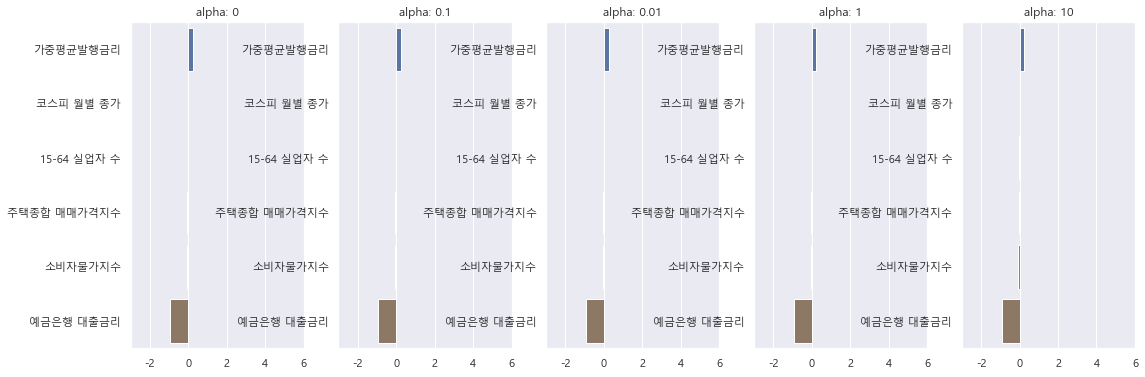

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [21]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
lasso_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(lasso_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [22]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001


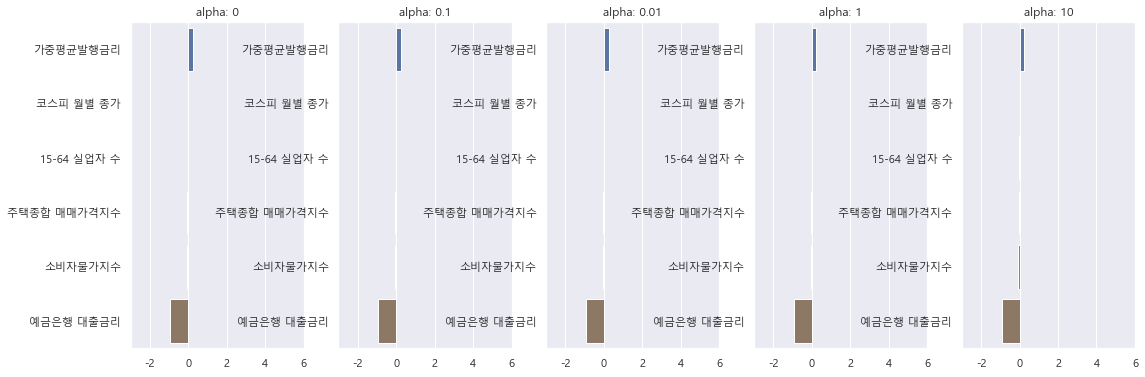

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [23]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
elastic_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(elastic_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [24]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001
